In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Import Dataset

In [3]:
from sklearn.datasets import load_wine

In [4]:
dataset = load_wine()

In [5]:
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(data=dataset.target, columns=['classes'])

# Data Explore

In [6]:
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0


In [7]:
y.sample(5)

,classes
115,1
157,2
155,2
91,1
55,0


In [8]:
X.shape

(178, 13)

In [9]:
y.shape

(178, 1)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [11]:
y['classes'].unique()

array([0, 1, 2])

<Axes: >

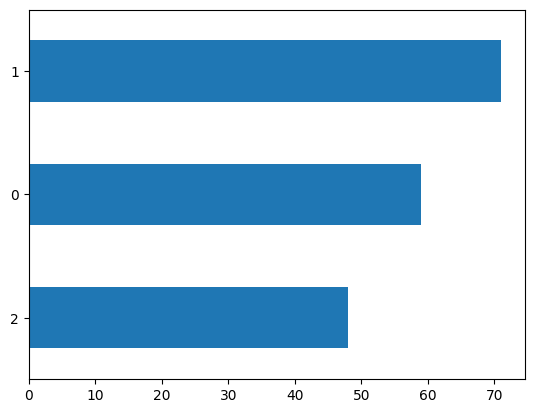

In [12]:
y.classes.value_counts().sort_values().plot(kind = 'barh')

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

# XGBoost Model

In [15]:
import xgboost as xgb

In [16]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [17]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3
}

In [18]:
bst = xgb.train(params, dtrain)

In [19]:
pred = bst.predict(dtest)

## Model Evaluation

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [22]:
def plot_confusion_matrix(y_test, pred, classes=dataset.target_names, normalized=True, cmap='Blues_r'):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=[7, 6])
    print('Confusion Matrix:')
    print(cm,'\n\n')
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

Confusion Matrix:
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]] 




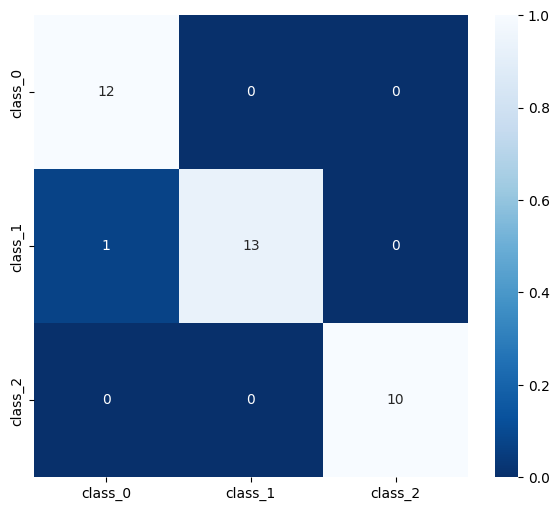

In [23]:
plot_confusion_matrix(y_test, pred, dataset.target_names)

# Support Vector Classifier (a flavour of SVM)

In [24]:
from sklearn.svm import SVC

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

SVC(random_state=101)

In [27]:
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.6480295566502463
Test Score: 0.6944444444444444


In [28]:
pred = svc.predict(X_test)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.56        36
weighted avg       0.54      0.69      0.60        36



## Model Optimzation (Hyper parameter tuning)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm = SVC()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [32]:
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9724137931034482
Test Score: 0.9722222222222222


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.51      0.64      0.56        36
weighted avg       0.54      0.69      0.60        36



# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train.values.ravel())
pred = knn_clf.predict(X_test)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      0.71      0.74        14
           2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



Confusion Matrix:
[[12  0  0]
 [ 0 10  4]
 [ 0  3  7]] 




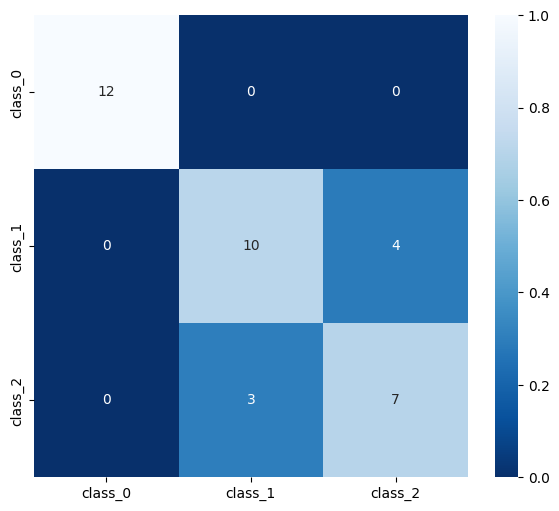

In [37]:
plot_confusion_matrix(y_test, pred)

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train.values.ravel())
pred = classifier.predict(X_test)

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]] 




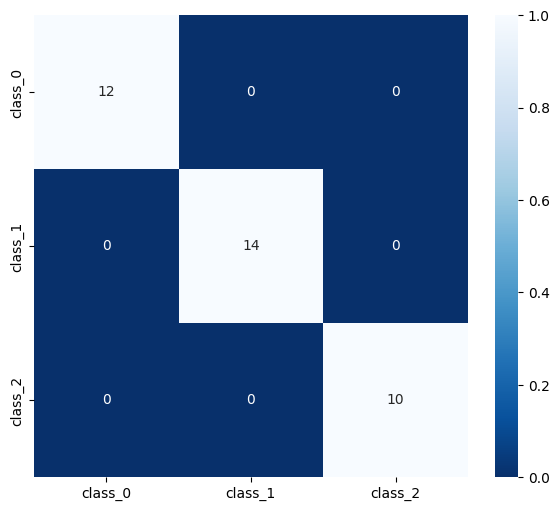

In [41]:
plot_confusion_matrix(y_test, pred)

# Naive Bayes

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [43]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=1))

In [44]:
model.fit(X_train, y_train.values.ravel())
pred = model.predict(X_test)

ValueError: ignored

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
plot_confusion_matrix(y_test, pred)

# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  
pred = classifier.predict(X_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]] 




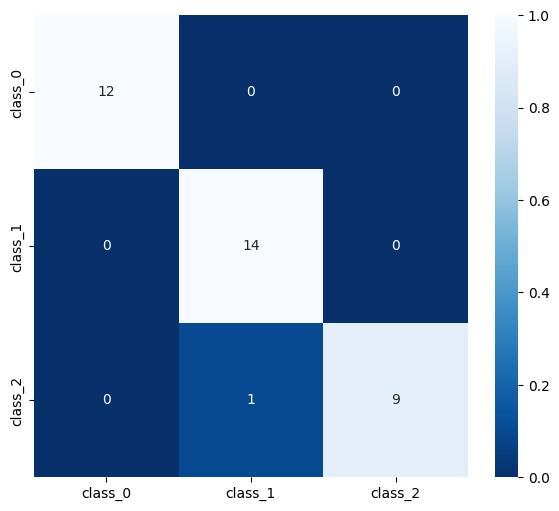

In [51]:
plot_confusion_matrix(y_test, pred)